In [26]:
import time
import random
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#from mpl_toolkits import mplot3d

In [30]:

def dotp(nk, nl: int):
    alpha=nk ; beta=nl ; gamma=0
    sin=[np.sin(np.radians(alpha)), np.sin(np.radians(beta)), np.sin(np.radians(gamma))]
    cos=[np.cos(np.radians(alpha)), np.cos(np.radians(beta)), np.cos(np.radians(gamma))]

    Rz=[[cos[2],-sin[2],0],[sin[2],cos[2],0],[0,0,1]]
    Ry=[[cos[1],0,sin[1]],[0,1,0],[-sin[1],0,cos[1]]]
    Rx=[[1,0,0],[0,cos[0],-sin[0]],[0,sin[0],cos[0]]]

    Rzy=np.matmul(Rz,Ry)
    Rzyx=np.matmul(Rzy,Rx)
    return Rzyx
def overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn):
    ##==========histogram overlapped region==================
    #========================================================
    e=np.histogram(xcoord[ind_m], bins= binn, range= [minl,maxl])
    g=np.histogram(xcoord[ind_c], bins= binn, range= [minl,maxl])

    mhist=np.array(e[0],dtype=int)  ;mrange=mhist.repeat(2)
    chist=np.array(g[0],dtype=int)*percent  ; crange=chist.repeat(2)
    chist1=np.array(g[1],dtype=float)  ; binrange1=chist1.repeat(2)[1:-1]

    mval=np.zeros(binn) ;   mval1=np.zeros(binn)
    frac1=np.zeros(binn) ;   mean_bin1=np.zeros(binn)
    maxbin=np.zeros(binn)

    for kj in range(len(mhist)):
        frac1[kj]+=min(mhist[kj],chist[kj])
        maxbin[kj]=max(mhist[kj],chist[kj])

    newlist1 = [xxs for xxs in frac1 if math.isnan(xxs) == False]

    over_p1=(sum(newlist1)/(sum(mhist)))
    maxbin=max(maxbin)
    return over_p1, maxbin, binrange1, mrange, crange

def find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1):
    mean_frac=np.zeros(len(rang))
    dif=np.zeros(len(rang))
    merger=np.zeros(len(rang)) ;   relax=np.zeros(len(rang))
    m_frac=np.zeros(len(rang)) ;   c_frac=np.zeros(len(rang))

    median_merger=np.median(rotated[ind_m, axis])
    median_merger1=np.median(rotated[ind_m, axis1])
    median_control=np.median(rotated[ind_c, axis])
    median_control1=np.median(rotated[ind_c, axis1])

    ##======================================================
    k=0
    percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
    rotated1=rotated[ind_all,:]
    ##======================================================
    for j in rang:    
        tota = np.where((rotated[:,axis] >= j) & (rotated[:,axis] < j+binn*2))
        aa1=np.shape(tota)[1]

        if median_merger >= median_control :
            tot = np.where(rotated1[:,axis] >= j)
            tot1 = np.where(rotated1[:,axis] < j)
        else : 
            tot = np.where(rotated1[:,axis] <= j)  
            tot1 = np.where(rotated1[:,axis] > j)

        cc=(rotated1[tot])
        ac=np.where(cc[:,3] == 1)
        bc=np.where(cc[:,3] == 10)
        merger[k]=np.shape(ac)[1]
        if (aa1>=bin_count) :
            m_frac[k]=(merger[k])/(np.shape(ac)[1]+np.shape(bc)[1]*percent)
        else :
            m_frac[k]= float('nan')

        cc1=(rotated1[tot1])
        ac1=np.where(cc1[:,3] == 1)
        bc1=np.where(cc1[:,3] == 10)
        relax[k]=np.shape(bc1)[1]

        if (aa1>=bin_count) :
            c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)
        else :
            c_frac[k]= float('nan')

        mean_frac[k]=((m_frac[k]+c_frac[k])/2)
        np.nan_to_num(mean_frac, copy=False)
        k=k+1

    nearz=np.where(abs(rang) == min(abs(rang)))[0]                
    minvalp=nearz
    return minvalp, m_frac, c_frac, mean_frac, median_merger, median_control

0.8660254037844387 0.49999999999999994 3.0616169978683824e-17


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 90, 30, 0, point:-0.055221, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.500000*y+0.000000*z,  coeff: 0.000000*x+0.000000*y+-1.000000*z
 dividing point:-0.055221, success rate: 0.739507 , overlap percentage: 42.000000, dividing criteria: 1.319507 


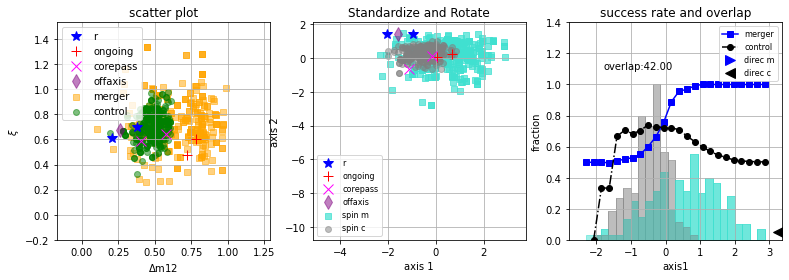

0.8660254037844387 0.49240387650610395 -0.08682408883346514


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 100, 30, 0, point:0.046816, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.492404*y+-0.086824*z,  coeff: 0.000000*x+-0.173648*y+-0.984808*z
 dividing point:0.046816, success rate: 0.756303 , overlap percentage: 47.333333, dividing criteria: 1.282970 


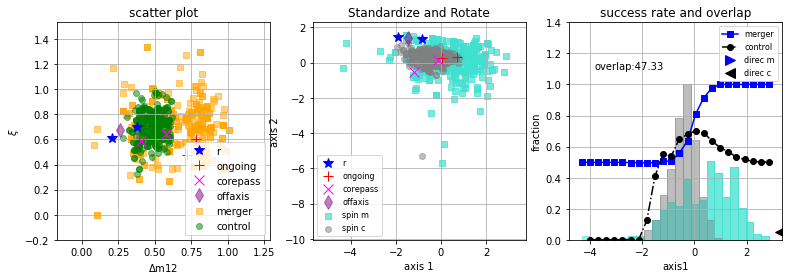

0.8660254037844387 0.46984631039295416 -0.17101007166283433


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 110, 30, 0, point:0.034577, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.469846*y+-0.171010*z,  coeff: 0.000000*x+-0.342020*y+-0.939693*z
 dividing point:0.034577, success rate: 0.740967 , overlap percentage: 44.000000, dividing criteria: 1.300967 


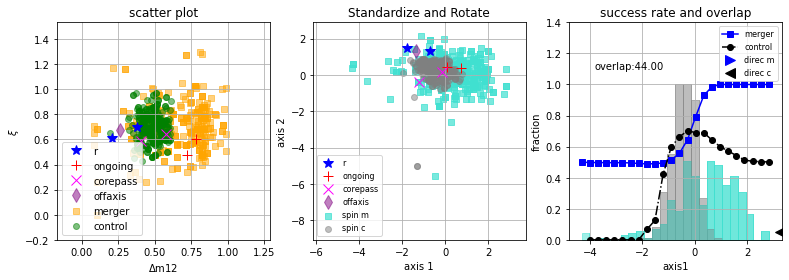

0.8660254037844387 0.4330127018922193 -0.24999999999999986


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 120, 30, 0, point:0.062239, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.433013*y+-0.250000*z,  coeff: 0.000000*x+-0.500000*y+-0.866025*z
 dividing point:0.062239, success rate: 0.765414 , overlap percentage: 40.666667, dividing criteria: 1.358747 


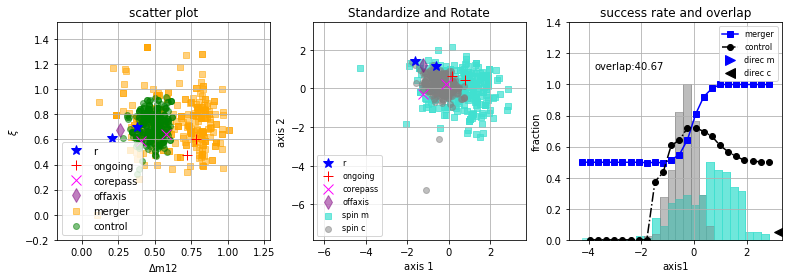

0.8660254037844387 0.38302222155948895 -0.3213938048432696


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 130, 30, 0, point:-0.072990, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.383022*y+-0.321394*z,  coeff: 0.000000*x+-0.642788*y+-0.766044*z
 dividing point:-0.072990, success rate: 0.725203 , overlap percentage: 40.333333, dividing criteria: 1.321869 


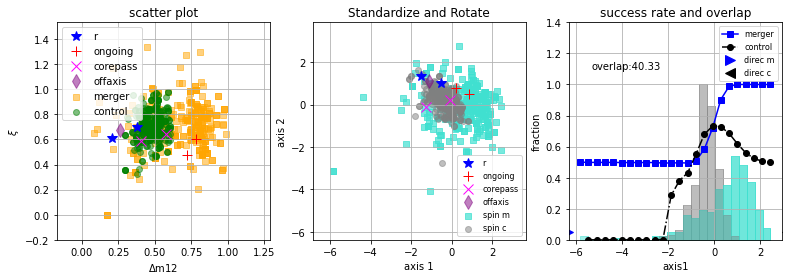

0.8660254037844387 0.3213938048432697 -0.3830222215594889


C:\Users\hyowon\AppData\Local\Temp/ipykernel_70848/3854206504.py:79: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'ksi', 'd_off']
degree : 140, 30, 0, point:-0.115542, mean: 0.5872763, std: 0.1805953, coeff: 0.866025*x+0.321394*y+-0.383022*z,  coeff: 0.000000*x+-0.766044*y+-0.642788*z
 dividing point:-0.115542, success rate: 0.693368 , overlap percentage: 42.666667, dividing criteria: 1.266701 


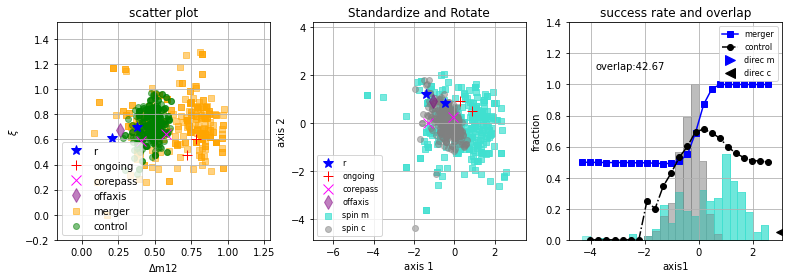

-0.00^{+ 0.06}_{-0.08}
 0.75^{+ 0.02}_{-0.02}
41.29^{+ 1.40}_{-1.38}


In [32]:
#3D rotation 
start = time.time()
f=open('2d_rotation_result.txt', 'w+')
print('ind1 ind2 angle  mean  std  coeff_x1  coeff_y1  div_point  success_r  overlap' , file=f)
#=============read obs data===================
df1 = pd.read_csv('../2ndproj/test_obs.txt', \
                    sep='\s+', usecols=['cl_idn',  'sparsity', 'm12', 'doff', 'xi', 'fsub']) 

cl_idn=df1.loc[:, 'cl_idn'].values ; ob_doff=df1.loc[:, 'doff'].values
ob_m12=df1.loc[:, 'm12'].values ; ob_ksi=df1.loc[:, 'xi'].values

ind_r=np.where((cl_idn == 'A963') | (cl_idn == 'A2261') )[0]
ind_u0=np.where((cl_idn == 'A2061') | (cl_idn == 'A2255'))[0]
ind_u1=np.where((cl_idn == 'A2034') | (cl_idn == 'A2443'))[0]
ind_u2=np.where((cl_idn == 'A115'))[0]

#=============read sim data===================
df = pd.read_csv('../Nclusterdata/test_sim.txt', \
                sep='\s+', usecols=['tsi','sparsity', 'm12', 'fsubms', 'ksi', 'd_off']) 

features=[['sparsity', 'm12', 'fsubms'],['sparsity', 'fsubms','ksi'],['m12','ksi','d_off'],\
['sparsity', 'fsubms', 'd_off'],['sparsity', 'm12', 'ksi'],['sparsity', 'ksi', 'd_off'],\
['sparsity', 'm12', 'd_off'],['m12', 'fsubms', 'ksi'],['m12', 'fsubms', 'd_off' ]]

features2=[['sparsity', r'$\Delta$m12', 'f_m*'],['sparsity', 'f_m*',r'$\xi$'],[r'$\Delta$m12',r'$\xi$','d_off'],\
['sparsity', 'f_m*', 'd_off'],['sparsity', r'$\Delta$m12', r'$\xi$'],['sparsity', r'$\xi$', 'd_off'],\
['sparsity', r'$\Delta$m12', 'd_off'],[r'$\Delta$m12', 'f_m*', r'$\xi$'],[r'$\Delta$m12', 'f_m*', 'd_off' ]]

#-----------------------basic variables--------------------------------------------------------
axes=np.array([0,1,2], dtype='object'); axis=0 ; axis1=1 ; min_op=np.zeros(5)
over_p=100 ; success_r=0 ; dv_criteria=0 #pre-paratemers
repeat=1000 #repeating for error estimation
#-------------------------------------------------------------------------------
ang_x=np.linspace(0,360,37) #73


for ii in range(2,3,1): #choose indicator combination
    #--------------------------------------------------------------------------------------------
    #blank array for saving results from repetition
    point=np.zeros(repeat) ; success_rate=np.zeros(repeat)   ; overlap_p=np.zeros(repeat)
    #--------------------------------------------------------------------------------------------
    xx1 = df.loc[:, features[ii]].values
    scaler = StandardScaler()
    xx = scaler.fit_transform(xx1)
    mean=scaler.mean_ ; std=scaler.scale_ 
 
    x = xx[:,0] ;     y = xx[:,1] ;     z = xx[:,2]
    tsi = df.loc[:,['tsi']].values

    for nk in range(90,150,10):
        for nl in range(30,40,10):
            #==================calculate spin angle==================  
            angles=np.array([nk, nl, 0])
            Rzyx =dotp(nk, nl)

            spinx=Rzyx[2,:]#[0,:]
            spiny=Rzyx[1,:]#[:,1]
            spinz=Rzyx[0,:]#[:,2]


            xcoord=x*Rzyx[0,0]+y*Rzyx[0,1]+z*Rzyx[0,2]
            ycoord=x*Rzyx[1,0]+y*Rzyx[1,1]+z*Rzyx[1,2]
            zcoord=x*Rzyx[2,0]+y*Rzyx[2,1]+z*Rzyx[2,2]
            print(Rzyx[0,0],Rzyx[0,1],Rzyx[0,2])
            #====================================================================================================================================
            #==================================================fraction calculation==============================================================
            colors=['pink', 'purple', 'cyan', 'gray']
            names=['Original PCA','rotate']

            xcoord1=np.array([xcoord])
            ycoord1=np.array([ycoord])
            zcoord1=np.array([zcoord])
            rot=np.concatenate((xcoord1.T,ycoord1.T,zcoord1.T), axis=1)

            wpca=np.concatenate((rot,tsi), axis=1)

            rotated=wpca 
            ind_m1=np.where(rotated[:, 3] == 1)[0]
            ind_c1=np.where(rotated[:, 3] == 10)[0] 
            ##==========histogram overlapped region==================
            #----------------add bootstrap sampling------------------
            cnt=0
            while cnt < repeat : 
                cnt=cnt+1
                ind_m = random.choices(ind_m1.tolist(), k=300)
                ind_c = random.choices(ind_c1.tolist(), k=300)
                ind_all=np.concatenate((ind_m, ind_c), axis=0)
               #----------------------base for histogram----------------------------------
                minl=min(rotated[ind_all,axis]) ;  maxl=max(rotated[ind_all,axis])
                binn=int((np.sqrt(np.shape(ind_m)[0]+np.shape(ind_c)[0]))) #number of bins
                rang=np.linspace(minl, maxl, binn) #range of data for bins
                bin_count=5 #minimum limitation number for cluster counts within a bin
                percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
                #################functions######################
                dvp=find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1)
                minvalp=dvp[0] ; m_frac=dvp[1]; c_frac=dvp[2] ;mean_frac=dvp[3]
                median_merger=dvp[4] ; median_control=dvp[5] 
                overlap_per=overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn)
                over_p1=overlap_per[0] ; maxbin=overlap_per[1]
                binrange1=overlap_per[2] ; mrange=overlap_per[3] ; crange=overlap_per[4] ;
                ###############################################
                success_r1=mean_frac[minvalp]
                dv_criteria1=(success_r1+(1-over_p1))
                #-----------save--repeated---result------------
                point[cnt-1]=rang[minvalp]
                success_rate[cnt-1]=mean_frac[minvalp]
                overlap_p[cnt-1]=over_p1*100
               #======================================================
                min_op[0]=over_p1
                min_op[1]=angles[0]
                min_op[2]=angles[1]
                min_op[3]=angles[2]
                #print(min_op)
                over_p=over_p1
                success_r=success_r1   #success rate is same with purity
                dv_criteria=dv_criteria1
                #==============================
                if cnt == repeat:
                    print(features[ii])
                    indname=features2[ii]
                    print('degree : %i, %i, %i, point:%f, mean: %f3, std: %f3, coeff: %f*x+%f*y+%f*z,  coeff: %f*x+%f*y+%f*z' \
                          %(angles[0],angles[1],angles[2], rang[minvalp], mean[0], std[0], Rzyx[0,0],Rzyx[0,1],Rzyx[0,2],Rzyx[1,0],Rzyx[1,1],Rzyx[1,2]) ) #z = (x - u) / s , u=mean, s=std
                  
                    print(' dividing point:%f, success rate: %f , overlap percentage: %f, dividing criteria: %f ' \
                          % ( rang[minvalp], mean_frac[minvalp], over_p*100., dv_criteria))
                    #======================================================
                    #=========================================================
                    fig = plt.figure(figsize = (13,4))

                    #ax = plt.axes(projection='3d')
                    ax = fig.add_subplot(1,3,1) 
                    ax.scatter((xx1[ind_m,0]),(xx1[ind_m,1]), marker='s', alpha=0.5,  c = 'orange', label='merger' ) 
                    ax.scatter((xx1[ind_c,0]),(xx1[ind_c,1]), marker='o', alpha=0.5,  c = 'g' , label='control') 
                    #--------------------------------------------------------
                    ax.plot(ob_m12[ind_r],ob_ksi[ind_r],marker='*', color='blue',markersize=10, label='r',linestyle="None")
                    ax.plot(ob_m12[ind_u0],ob_ksi[ind_u0],marker='+', color='r',markersize=10, label='ongoing',linestyle="None")
                    ax.plot(ob_m12[ind_u1],ob_ksi[ind_u1],marker='x',  color='magenta',markersize=10, label='corepass',linestyle="None")
                    ax.plot(ob_m12[ind_u2],ob_ksi[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                    #--------------------------------------------------------
                    ax.set_title('scatter plot')
                    ax.set_ylabel(indname[1])
                    ax.set_xlabel(indname[0])
                    ax.set_xlim([min(xx1[:,0])-0.2, max(xx1[:,0])+0.2])
                    ax.set_ylim([min(xx1[:,1])-0.2, max(xx1[:,1])+0.2])
                    ax.legend()
                    ax.text(2,1.05,'entire', fontsize=15)
                    ax.grid()
                    #========================================================
                    #=========================================================
                    ax2 = fig.add_subplot(1,3,2) 
                    ax2.scatter(xcoord[ind_m],ycoord[ind_m], marker='s', c = 'turquoise', alpha=0.7, label='spin m' ) 
                    ax2.scatter(xcoord[ind_c],ycoord[ind_c], marker='o', c = 'gray', alpha=0.5, label='spin c' ) 
                    #--------------------------------------------------------
                    xcoord2=Rzyx[0,0]*((ob_m12-mean[0])/std[0])+Rzyx[0,1]*((ob_ksi-mean[1])/std[1])+Rzyx[0,2]*((ob_doff-mean[2])/std[2])
                    ycoord2=Rzyx[1,0]*((ob_m12-mean[0])/std[0])+Rzyx[1,1]*((ob_ksi-mean[1])/std[1])+Rzyx[1,2]*((ob_doff-mean[2])/std[2])
                    #zcoord2=Rzyx[2,0]*((ob_m12-mean[0])/std[0])+Rzyx[2,1]*((ob_ksi-mean[1])/std[1])+Rzyx[2,2]*((ob_doff-mean[2])/std[2])
                    ax2.plot(xcoord2[ind_r],ycoord2[ind_r],marker='*', color='blue',markersize=10, label='r',linestyle="None")
                    ax2.plot(xcoord2[ind_u0],ycoord2[ind_u0],marker='+', color='red',markersize=10, label='ongoing',linestyle="None")
                    ax2.plot(xcoord2[ind_u1],ycoord2[ind_u1],marker='x', color='magenta',markersize=10, label='corepass',linestyle="None")
                    ax2.plot(xcoord2[ind_u2],ycoord2[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                    #--------------------------------------------------------
                    ax2.set_xlabel('axis 1')
                    ax2.set_ylabel('axis 2')
                    ax2.set_title('Standardize and Rotate')
                    ax2.set_xlim([min(xcoord)-0.5, max(xcoord)+0.5])
                    ax2.set_ylim([min(ycoord)-0.5, max(ycoord)+0.5])
                    ax2.legend(loc='best',fontsize = 8)
                    ax2.grid()    
                    ##==================line plot==============================
                    #==========================================================
                    ax3 = fig.add_subplot(1,3,3)
                    ax3.grid()
                    mergers=ax3.plot(rang, m_frac, marker='s',linestyle='-', color='blue', label='merger')
                    controls=ax3.plot(rang, c_frac, marker='o',linestyle='-.', color='black', label='control')
                    if median_merger >= median_control : 
                        ax3.plot(min(xcoord),0.05,marker='>', color='blue',markersize=10, label='direc m',linestyle="None")
                        ax3.plot(max(xcoord),0.05,marker='<', color='black',markersize=10, label='direc c',linestyle="None")
                    else : 
                        ax3.plot(max(xcoord),0.05,marker='<', color='blue',markersize=10, label='direc m',linestyle="None")
                        ax3.plot(min(xcoord),0.05,marker='>', color='black',markersize=10, label='direc c',linestyle="None")

                    ax3.set_title('success rate and overlap') 
                    ax3.set_ylabel('fraction')
                    ax3.set_xlabel('axis1')
                    ax3.legend(loc='best',fontsize = 8)
                    ax3.set_xlim(minl-0.5, maxl+0.5) 
                    ax3.set_ylim([0,1.4])
                    ax3.text(minl+0.5, 1.1, 'overlap:%5.2f' %(over_p*100.))

                    for i in range(len(binrange1)):
                        if i == len(binrange1)-1 : 
                            e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise', label='merger') 
                            g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray', label='control')
                        else:
                            e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise') ## 히스토그램
                            g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray')

                    plt.show()
    onesig=68.2 ; twosig=95 ; samsig=99.7
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(point),np.mean(point)-np.percentile(point, 100-onesig),np.mean(point)-np.percentile(point, onesig)))
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(success_rate),np.mean(success_rate)-np.percentile(success_rate, 100-onesig),np.mean(success_rate)-np.percentile(success_rate, onesig)))
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(overlap_p),np.mean(overlap_p)-np.percentile(overlap_p, 100-onesig),np.mean(overlap_p)-np.percentile(overlap_p, onesig)))
end = time.time()
#print(end - start)
f.close()